In [3]:
library(tidyverse)
library(prob)
library(ggplot2)
library(tidyr)
library("dplyr")

In [17]:
options(repr.plot.width=8, repr.plot.height=8)

In [4]:
pokemon <- read_csv(file = "pokemon.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  abilities = col_character(),
  capture_rate = col_character(),
  classfication = col_character(),
  japanese_name = col_character(),
  name = col_character(),
  type1 = col_character(),
  type2 = col_character()
)
ℹ Use `spec()` for the full column specifications.




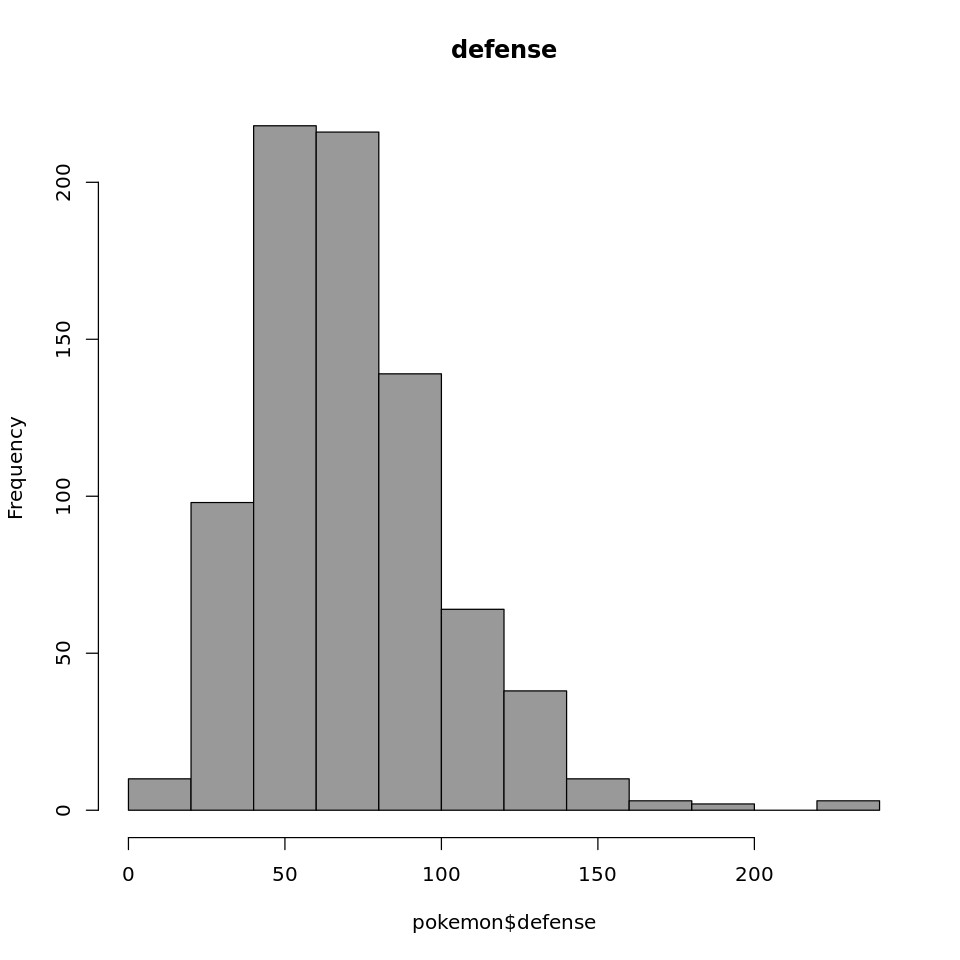

In [18]:
hist(pokemon$defense    , main="defense", col='gray60') 

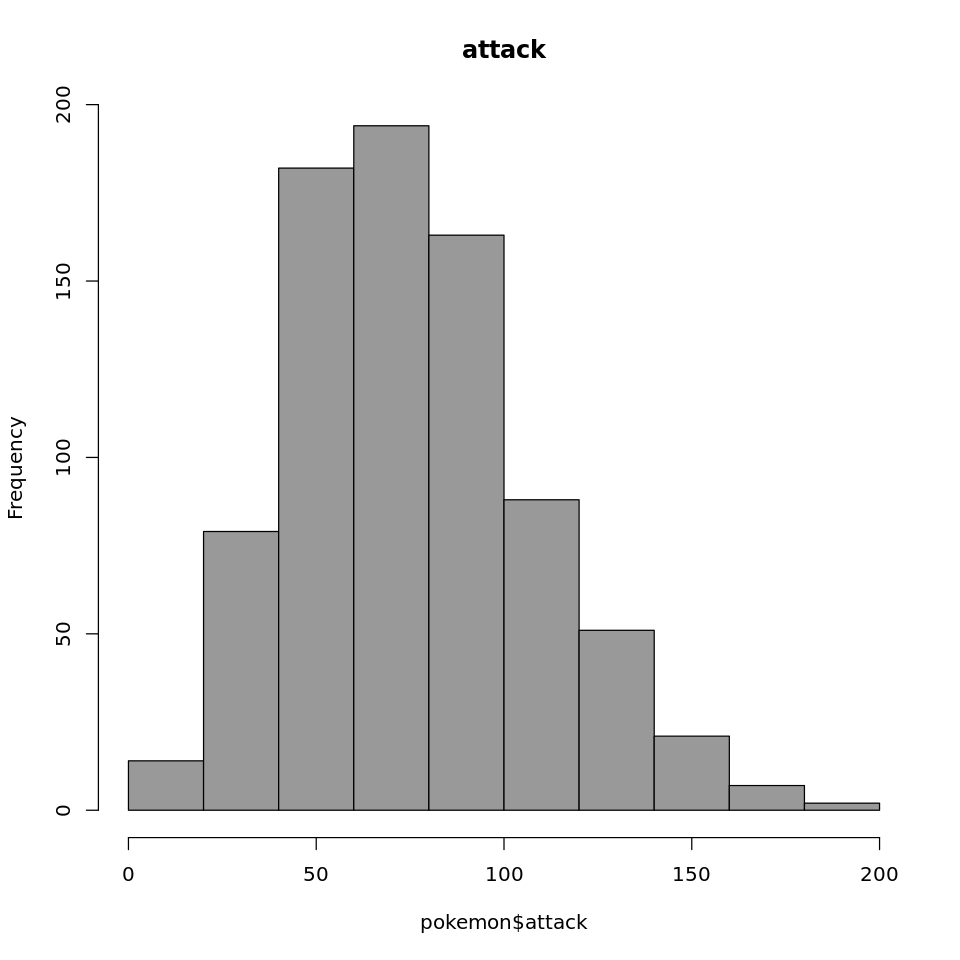

In [19]:
hist(pokemon$attack     , main="attack", col='gray60') 

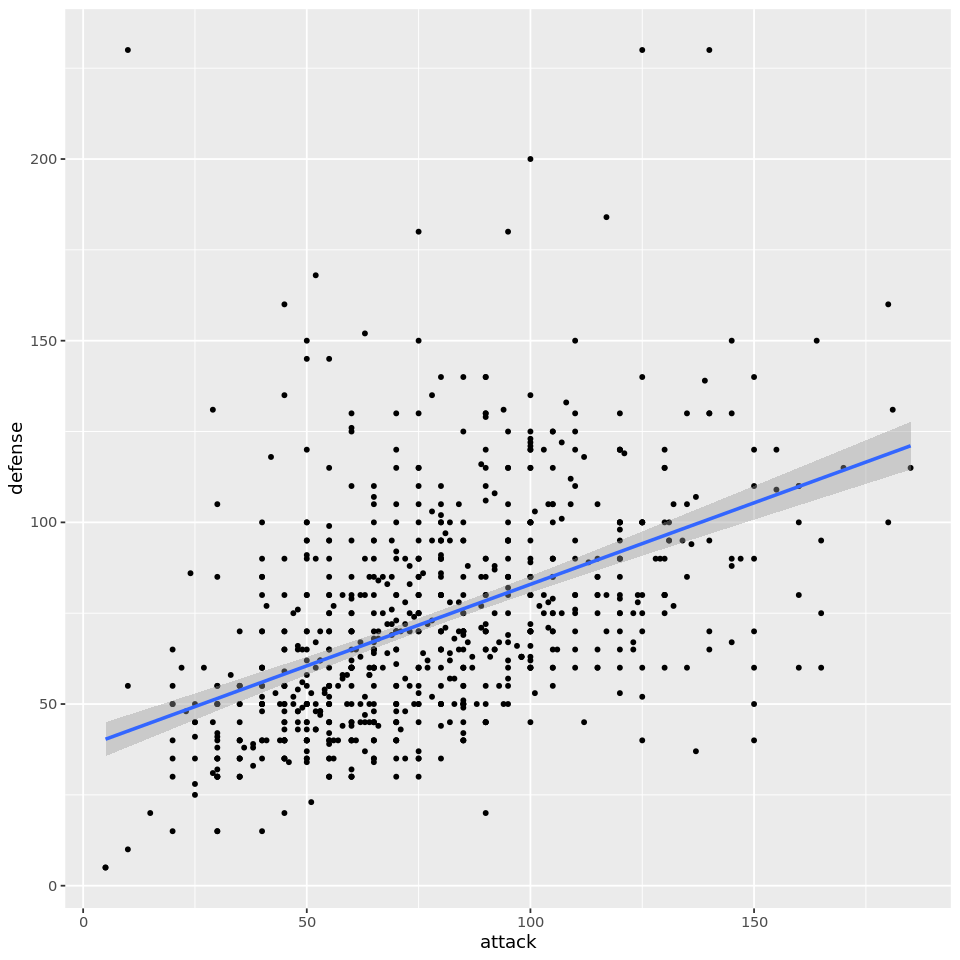

In [20]:
ggplot(pokemon)+
geom_point(aes(x=attack, y=defense),size=1) +
geom_smooth(formula = "y~x", aes(x=attack, y=defense),method="lm")

In [21]:
def_att <- data.frame(pokemon$defense,pokemon$attack,pokemon$type1 )

calculos de medias 

In [22]:
median_def <- median(pokemon$defense)
median_att <- median(pokemon$attack)

In [23]:
power_att <- ifelse(pokemon$attack >= median_att, "fuerte", "debil")
power_def <- ifelse(pokemon$defense >= median_def, "fuerte", "debil")

In [24]:
def_att_gg <- gather(data = def_att, key = "medida", value = "valor", 1:2)
def_att_gg$power <-c(power_att, power_def)
head(def_att_gg)

,pokemon.type1,medida,valor,power
,<chr>,<chr>,<dbl>,<chr>
1,grass,pokemon.defense,49,debil
2,grass,pokemon.defense,63,debil
3,grass,pokemon.defense,123,fuerte
4,fire,pokemon.defense,43,debil
5,fire,pokemon.defense,58,debil
6,fire,pokemon.defense,78,fuerte


In [25]:
head(def_att)

,pokemon.defense,pokemon.attack,pokemon.type1
,<dbl>,<dbl>,<chr>
1,49,49,grass
2,63,62,grass
3,123,100,grass
4,43,52,fire
5,58,64,fire
6,78,104,fire


In [26]:
gf <- ggplot(data=def_att_gg)

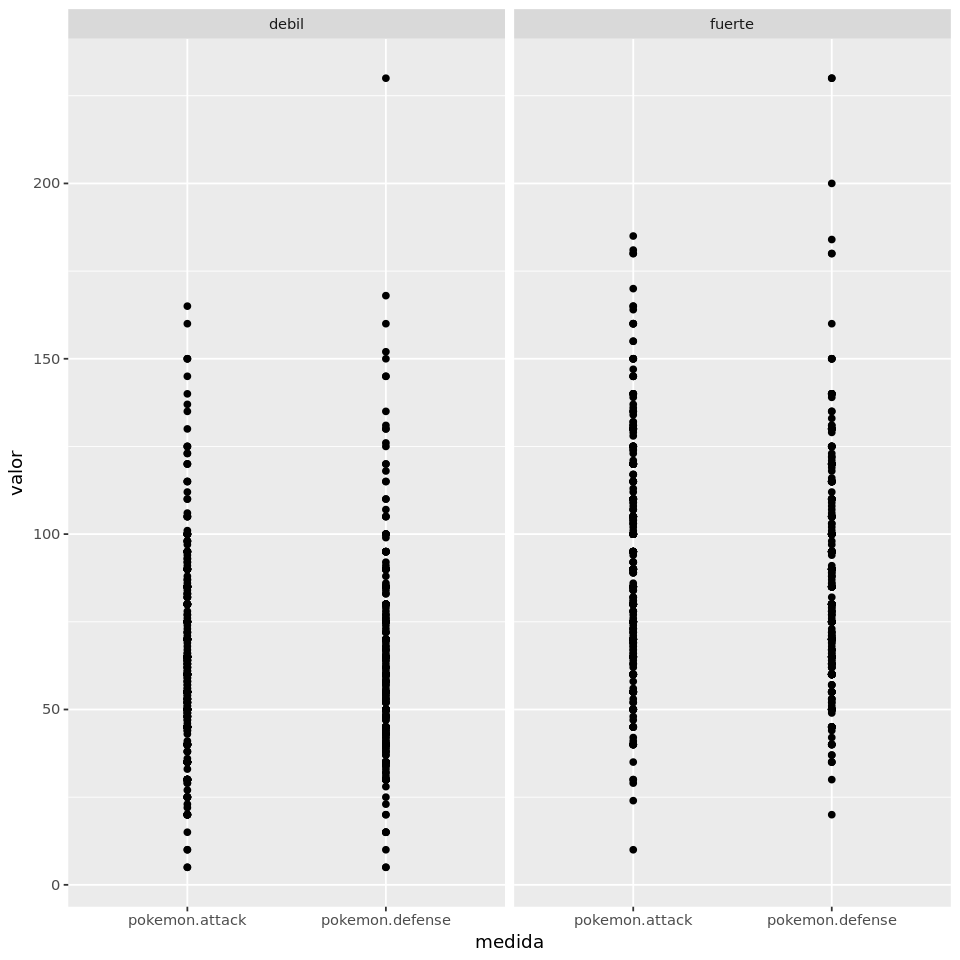

In [27]:
gf + geom_point(aes(x=medida,y=valor),size=1.5)+
facet_wrap(~power)

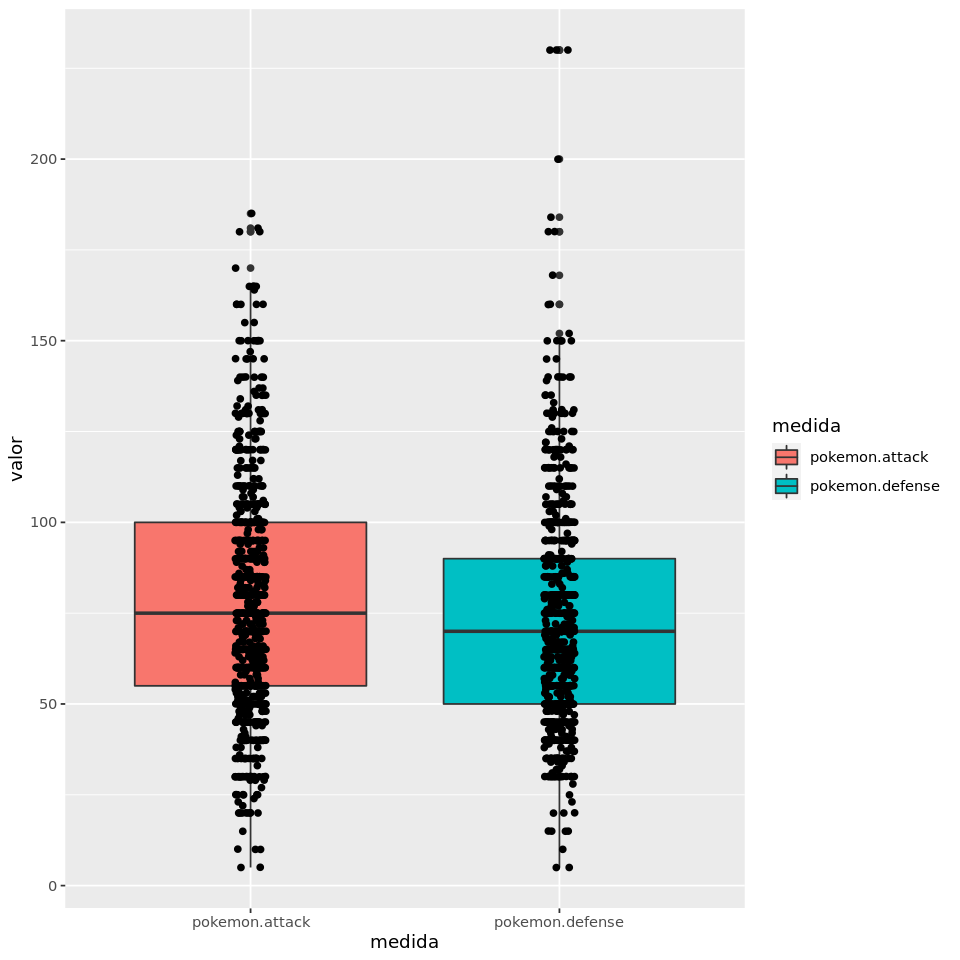

In [28]:
gf + 
geom_boxplot(aes(x=medida, y=valor, fill = medida)) + 
geom_jitter(aes(x=medida,y=valor),
            position=position_jitter(width=0.05,height=0.05),
            size=1.5)

In [29]:
summary(def_att_gg)

 pokemon.type1         medida              valor           power          
 Length:1602        Length:1602        Min.   :  5.00   Length:1602       
 Class :character   Class :character   1st Qu.: 52.00   Class :character  
 Mode  :character   Mode  :character   Median : 70.00   Mode  :character  
                                       Mean   : 75.43                     
                                       3rd Qu.: 95.00                     
                                       Max.   :230.00                     

In [38]:
def_att$name <- pokemon$name

In [40]:
def_att$razon <-  pokemon$attack/ pokemon$defense

In [51]:
def_att %>% 
  arrange(razon) -> ord
   


Con esta informacion podemos contestar preguntas como: 

cuales pokemones tienen una razon de mayor defensa vs ataque ?

In [59]:
subset(ord, razon < 1 ) %>% head

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
1,230,10,bug,Shuckle,0.04347826
2,55,10,water,Magikarp,0.18181818
3,131,29,psychic,Cosmoem,0.22137405
4,86,24,steel,Bronzor,0.27906977
5,160,45,rock,Onix,0.28125000
6,105,30,fire,Darmanitan,0.28571429


cuales pokemones tienen una razon de mayor ataque vs defensa ?


In [56]:
subset(ord, razon > 1 ) %>% tail

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
796,60,165,rock,Rampardos,2.750000
797,50,150,steel,Aegislash,3.000000
798,40,125,rock,Cranidos,3.125000
799,37,137,bug,Pheromosa,3.702703
800,40,150,bug,Beedrill,3.750000
801,20,90,water,Carvanha,4.500000


Que pokemones tinen un equilibrio entre su ataque y defensa?

In [62]:
subset(ord, razon == 1 ) %>% tail

,pokemon.defense,pokemon.attack,pokemon.type1,name,razon
,<dbl>,<dbl>,<chr>,<chr>,<dbl>
368,69,69,water,Brionne,1
369,74,74,water,Primarina,1
370,70,70,fire,Oricorio,1
371,95,95,normal,Type: Null,1
372,95,95,normal,Silvally,1
373,139,139,bug,Buzzwole,1
